first diagram: description of NGRAMS

In [3]:
from plotnine import *
import pandas as pd

In [16]:
NGRAMS_df = pd.read_csv('..\data\perception_data.csv')

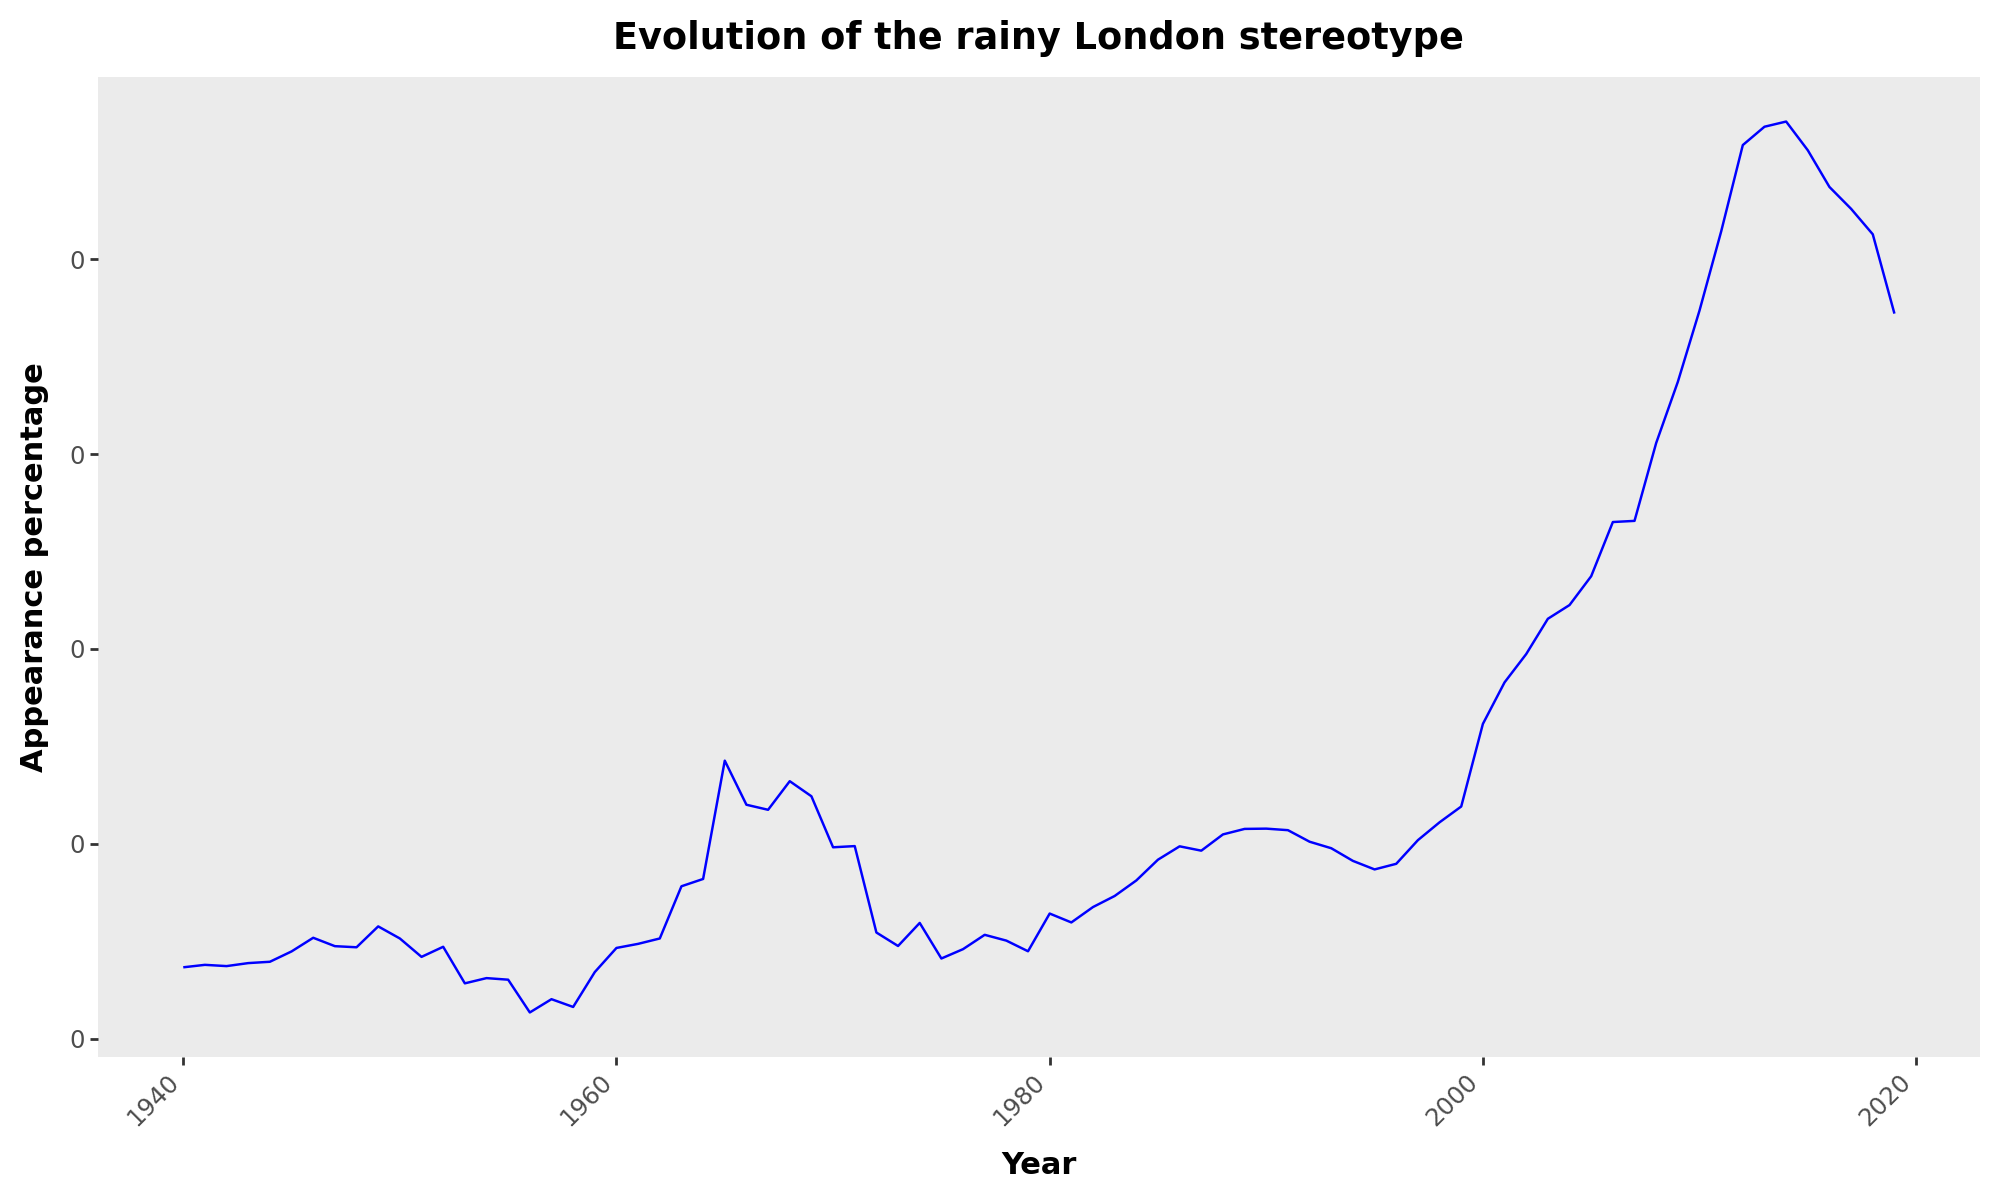

In [24]:
# Plot the aggregated data
NGRAMS_plot = (ggplot(NGRAMS_df) +
        aes(x='Year', y='Appearances') +
        geom_line(color='blue') +
        labs(title='Evolution of the rainy London stereotype', x='Year', y='Appearance percentage') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_text_y=element_text(hjust=1),  # Add a comma here
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold'),
              panel_grid=element_blank()) +
        theme(figure_size=(10, 6))  # Adjust the figure size
       )

# Displaying the plot
NGRAMS_plot.show()

In [18]:
NGRAMS_relative_df = pd.read_csv('..\\data\\relative_perception_data.csv')


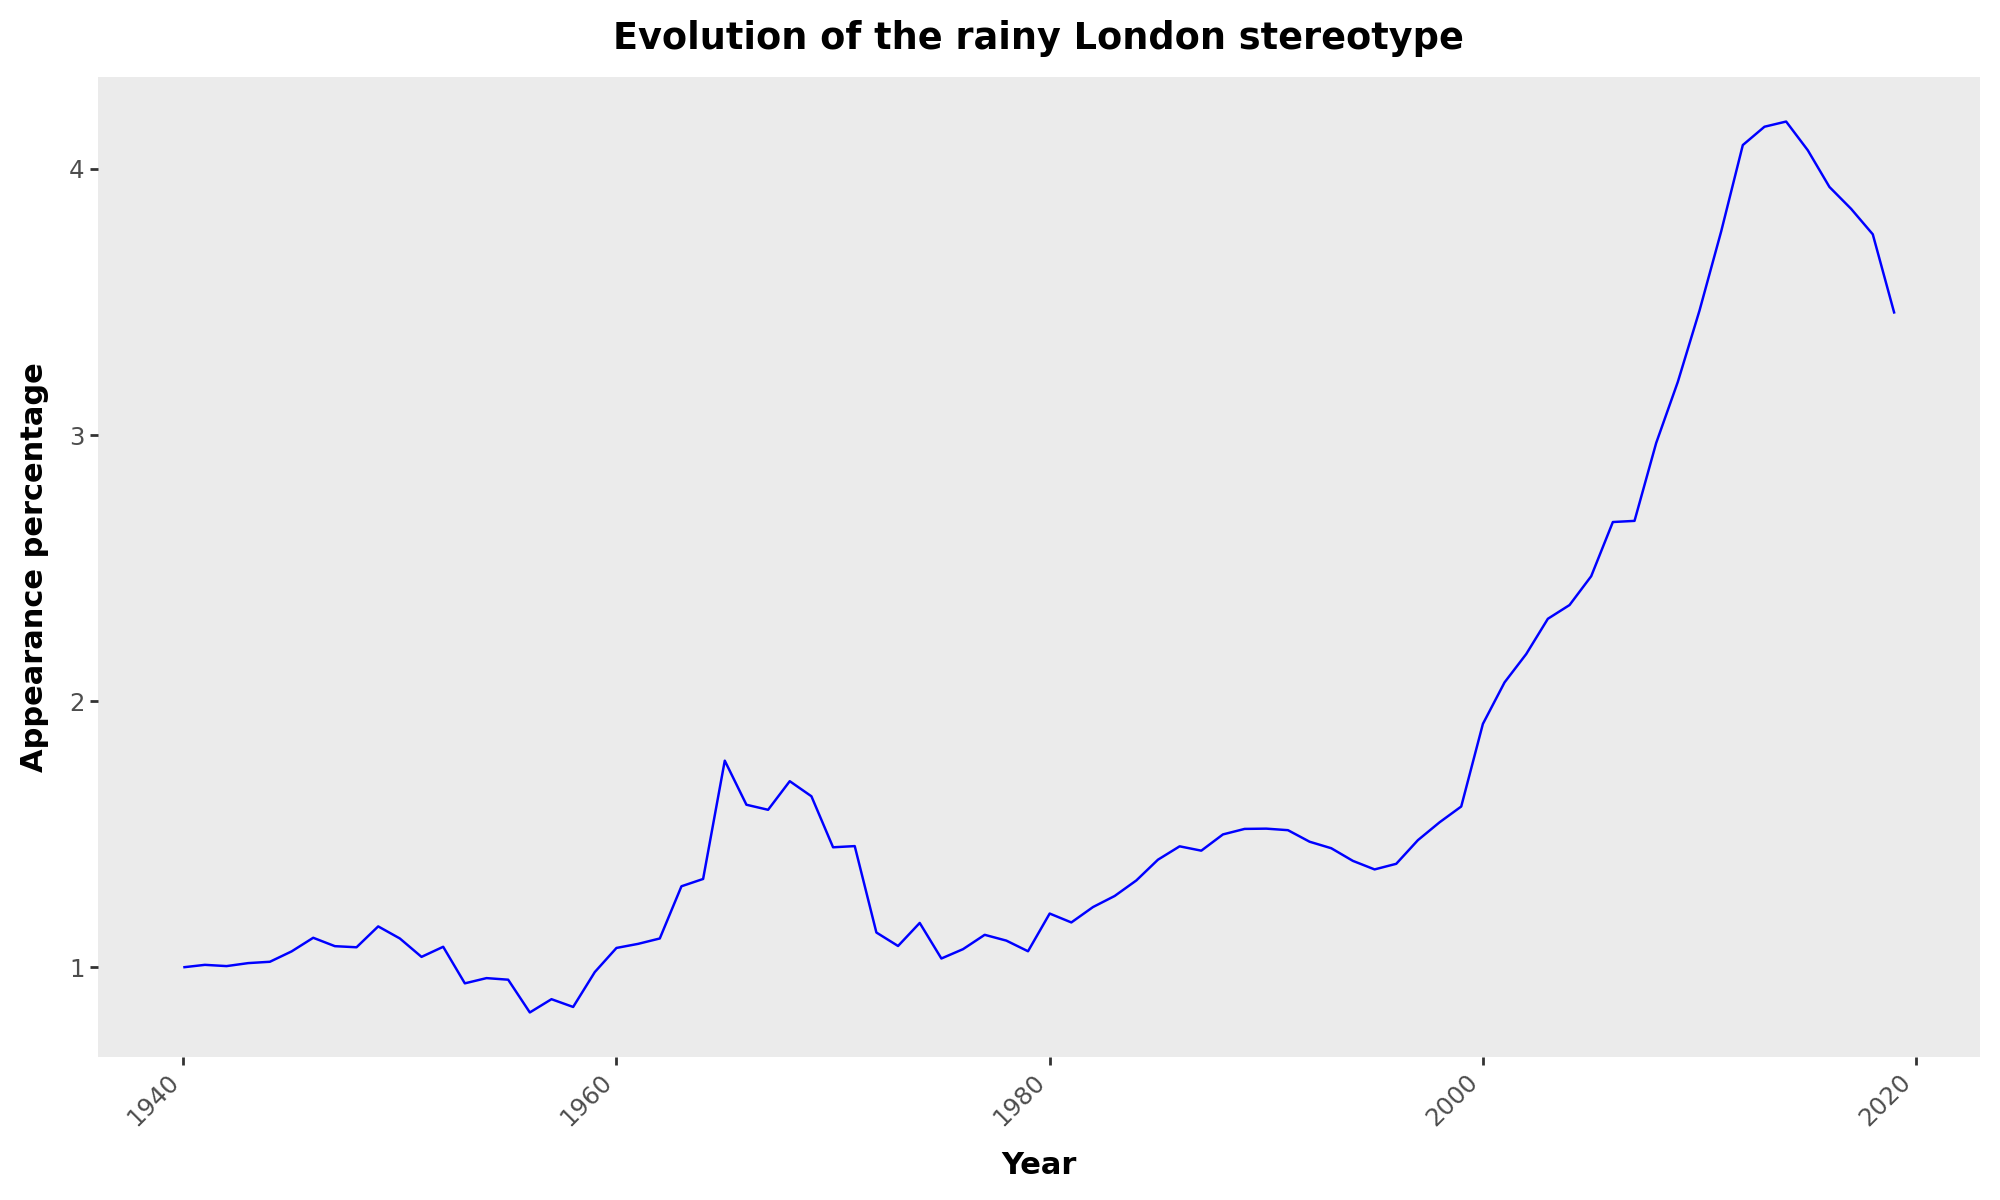

In [19]:
# Plot the aggregated data
NGRAMS_rel_plot = (ggplot(NGRAMS_relative_df) +
        aes(x='Year', y='Perception') +
        geom_line(color='blue') +
        labs(title='Evolution of the rainy London stereotype', x='Year', y='Appearance percentage') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold'),
              panel_grid=element_blank()) +
        theme(figure_size=(10, 6))  # Adjust the figure size
       )

# Displaying the plot
NGRAMS_rel_plot.show()

## more complex interactions:

In [65]:
weather_df = pd.read_csv('..\\data\\weather_data.csv')

In [69]:
#Drop years not available in the NGRAM data
weather_df = weather_df.drop(weather_df[weather_df['date'].str.startswith(('2020','2021','2022','2023'))].index)

# Convert 'date' column to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Extract year from the 'date' column
weather_df['Year'] = weather_df['date'].dt.year

# Group by 'city' and 'year' and calculate the average precipitation and temperature
weather_av_df = weather_df.groupby(['city', 'Year']).agg({'temperature_2m_max': 'mean', 'temperature_2m_min':'mean','temperature_2m_mean':'mean','daylight_duration':'mean','sunshine_duration':'mean','precipitation_sum':'mean','rain_sum':'mean','precipitation_hours':'mean'}).reset_index()


In [79]:
#restrict the data to London only as other cities are not available in the NGRAM data (explain with english language)
london_weather_df = weather_av_df[weather_av_df['city'] == 'London'].copy()
london_weather_df.reset_index(drop=True, inplace=True)

london_weather_df

,city,Year,temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours
0,London,1940,13.484183,6.550713,10.068837,44144.924281,26880.139786,1.298082,1.214521,3.729508
1,London,1941,13.085692,6.732541,9.977552,44187.043847,25455.916658,1.403562,1.329589,4.287671
2,London,1942,12.813226,6.286788,9.575777,44187.254567,25704.596571,1.385753,1.284384,4.013699
3,London,1943,14.088431,6.741034,10.470914,44187.987899,27996.281854,1.183562,1.169315,3.369863
4,London,1944,13.432817,6.426123,9.946023,44144.917426,27961.525157,1.248087,1.240710,3.584699
...,...,...,...,...,...,...,...,...,...,...
75,London,2015,14.396418,7.491075,11.050442,44187.900186,24927.255311,1.746849,1.732329,3.131507
76,London,2016,14.350757,7.470019,10.950626,44145.667290,25817.634923,1.591530,1.583880,3.092896
77,London,2017,14.819904,7.617027,11.266331,44187.979104,24455.044566,1.807671,1.743836,3.884932
78,London,2018,15.504013,7.572233,11.543728,44187.966096,25978.248658,1.685753,1.625479,3.810959


In [82]:
# Merge weather and NGRAMS data
london_inter_df = pd.merge(london_weather_df, NGRAMS_df, on='Year')

=> keeping other variables -- if want to do other interactions with other weather variables eg temp for climate change

In [81]:
london_inter_df

,city,Year,temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,Appearances
0,London,1940,13.484183,6.550713,10.068837,44144.924281,26880.139786,1.298082,1.214521,3.729508,2.731485e-09
1,London,1941,13.085692,6.732541,9.977552,44187.043847,25455.916658,1.403562,1.329589,4.287671,2.756745e-09
2,London,1942,12.813226,6.286788,9.575777,44187.254567,25704.596571,1.385753,1.284384,4.013699,2.743879e-09
3,London,1943,14.088431,6.741034,10.470914,44187.987899,27996.281854,1.183562,1.169315,3.369863,2.774656e-09
4,London,1944,13.432817,6.426123,9.946023,44144.917426,27961.525157,1.248087,1.240710,3.584699,2.788329e-09
...,...,...,...,...,...,...,...,...,...,...,...
75,London,2015,14.396418,7.491075,11.050442,44187.900186,24927.255311,1.746849,1.732329,3.131507,1.111827e-08
76,London,2016,14.350757,7.470019,10.950626,44145.667290,25817.634923,1.591530,1.583880,3.092896,1.074132e-08
77,London,2017,14.819904,7.617027,11.266331,44187.979104,24455.044566,1.807671,1.743836,3.884932,1.051684e-08
78,London,2018,15.504013,7.572233,11.543728,44187.966096,25978.248658,1.685753,1.625479,3.810959,1.025569e-08


In [ ]:
aesthetics = aes(x='Year', y='Appearances', size='precipitation_sum', color='temperature')
#to add another variable with color-- idea for other graphs

Graph: interaction between NGRAMS perception and precipitation hours

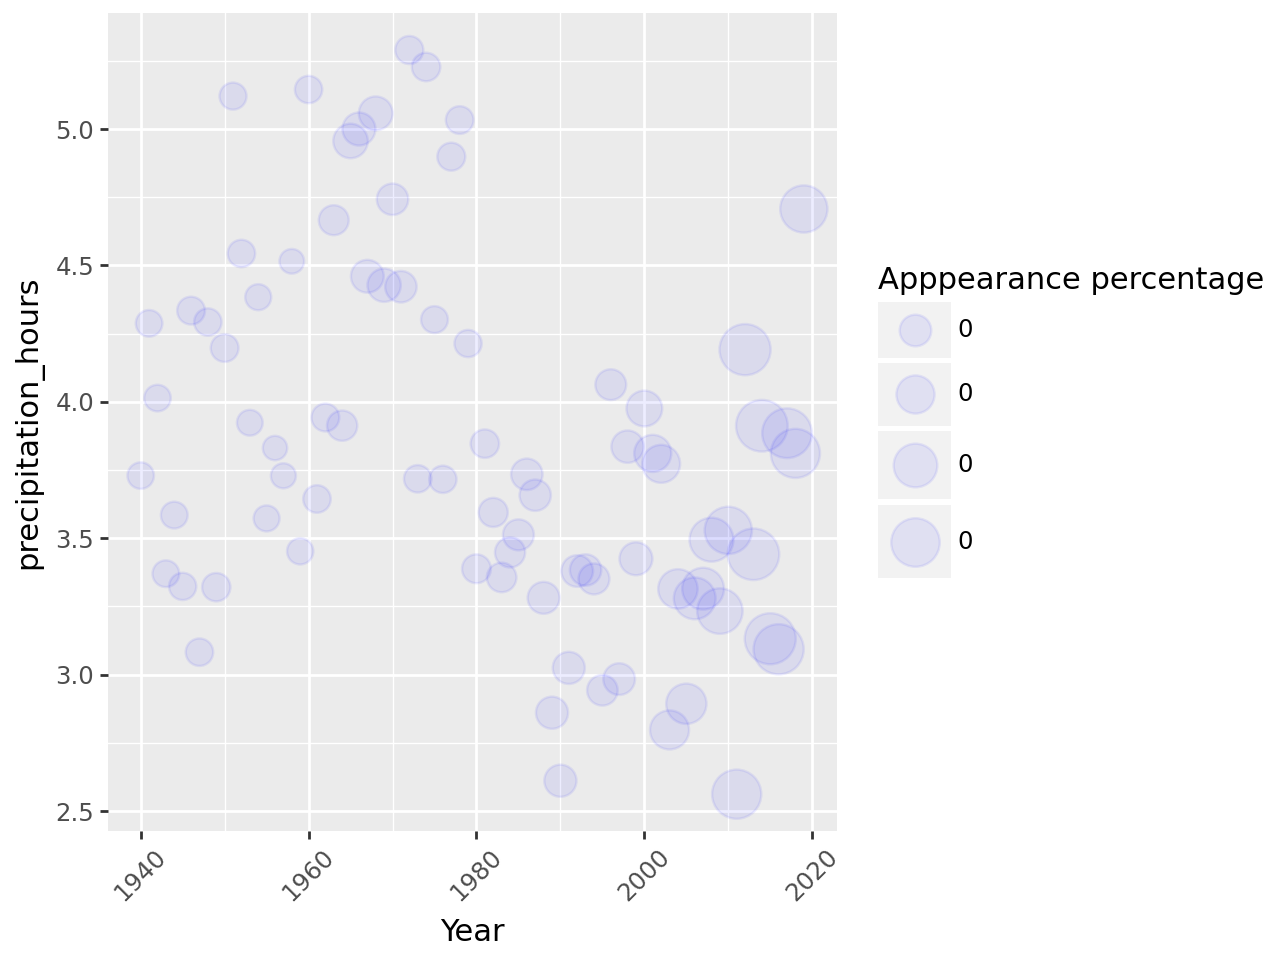

In [111]:
from plotnine import ggplot, aes, geom_point, scale_size_area

# Define aesthetics
aesthetics = aes(x='Year', y='precipitation_hours', size='Appearances')

# Create the plot
bubble_plot = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.07, color='blue') + \
    scale_size_area(max_size=10) + \
    theme(axis_text_x=element_text(rotation=45),
          legend_title=element_text(text="Apppearance percentage"))

# Display the plot
bubble_plot.show()

buiding diagram df for precipitation hours